In [2]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.figure_factory as ff
%matplotlib inline

In [3]:
#reading csv file
df=pd.read_csv("Mall_Customers.csv")
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

## Preprocessing the Data

In [6]:
#renaming the column
df.rename(columns = {'Genre':'Gender'}, inplace = True)

In [7]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [8]:
#checking the null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#droping CustomerID
df.drop("CustomerID",axis=1,inplace=True)

In [10]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

## Some Visualisation

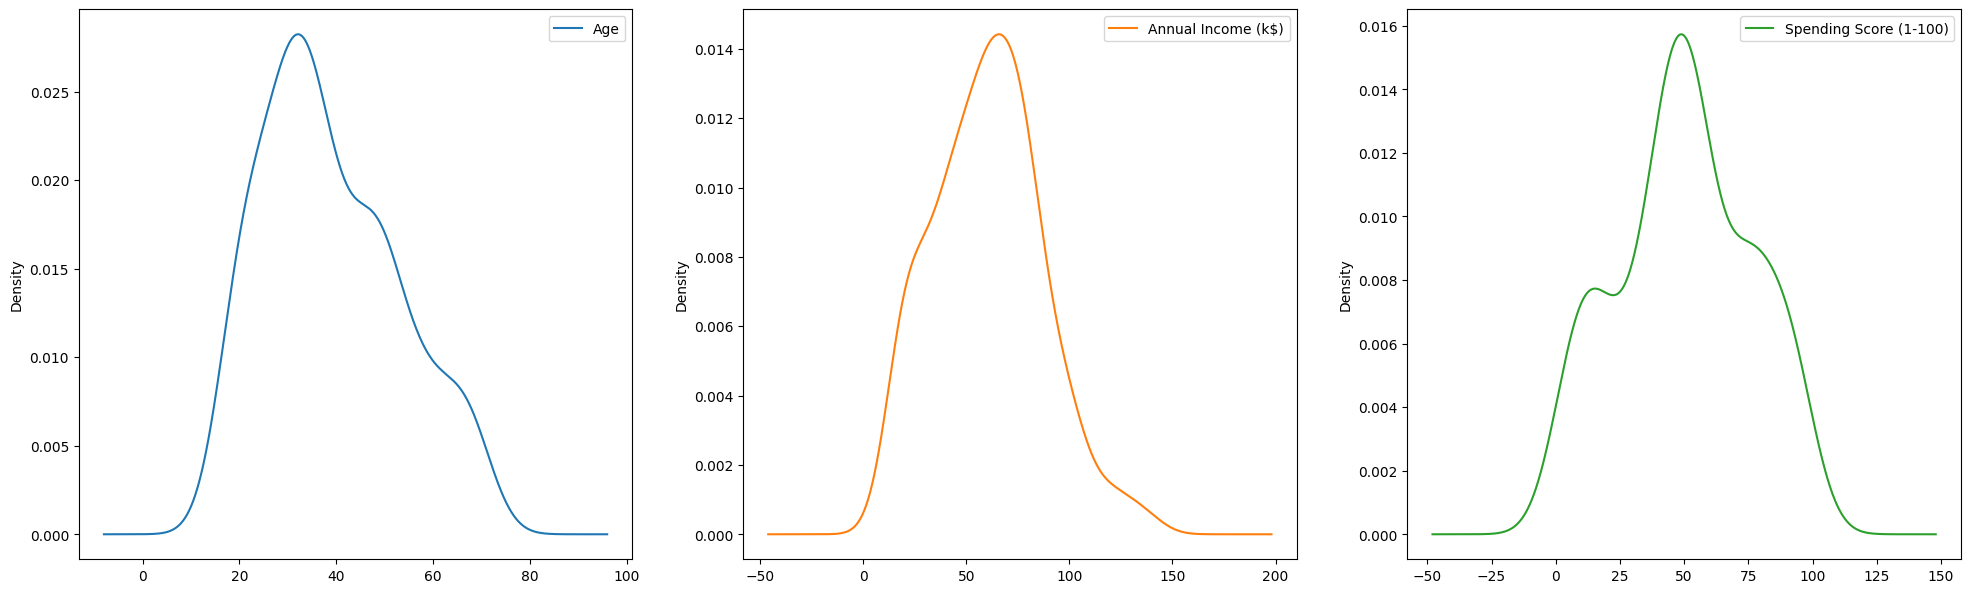

In [11]:
df.plot(kind='kde',subplots=True ,layout=(6,6), sharex=False,figsize=(50,50))
plt.show() 

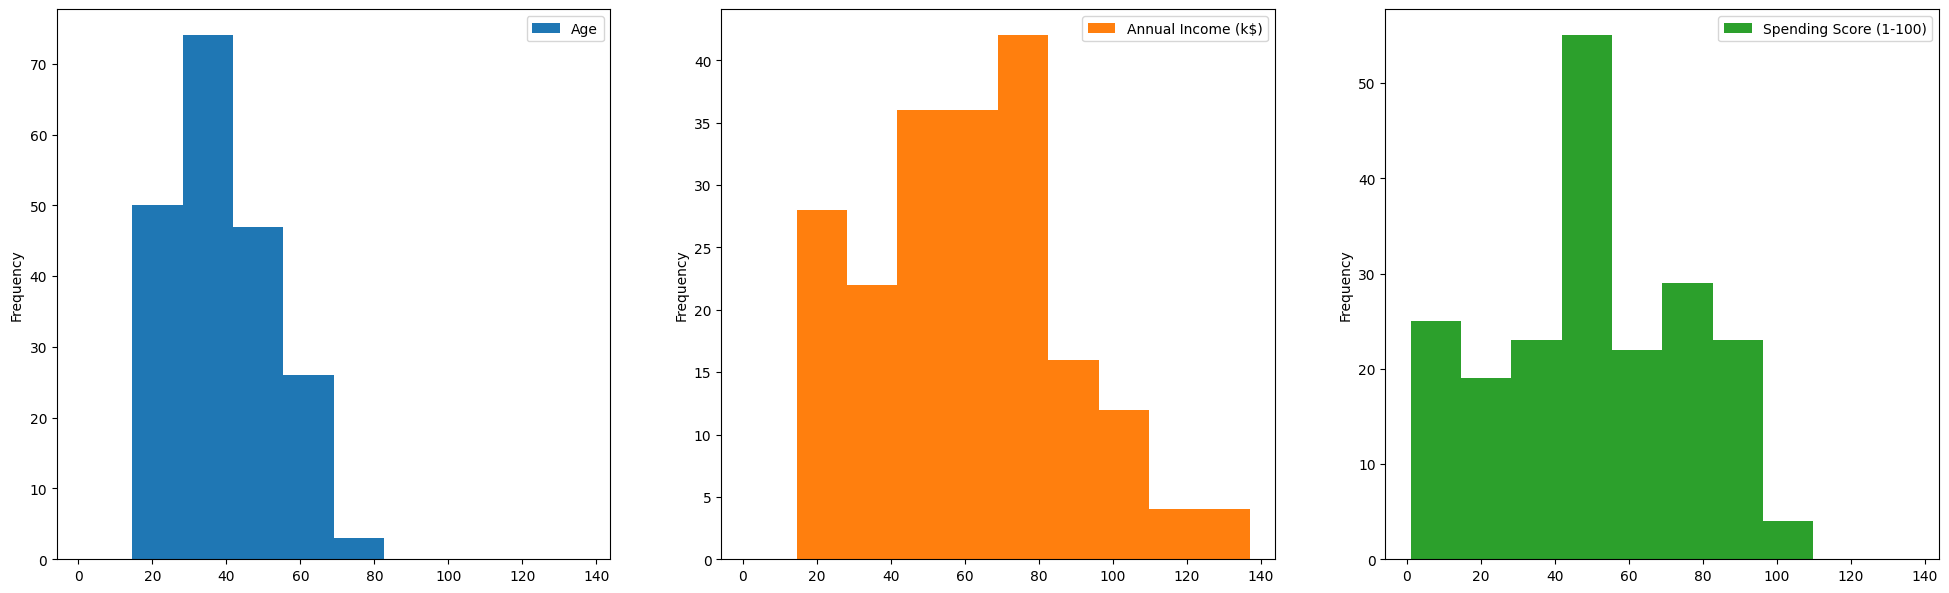

In [12]:
df.plot(kind='hist',subplots=True ,layout=(6,6), sharex=False,figsize=(50,50))
plt.show() 

- #### Age group near 30-40 have the highest density.
- #### Most customers have income in range of 50-80k.
- #### Most of the customers have spending score of 50.

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

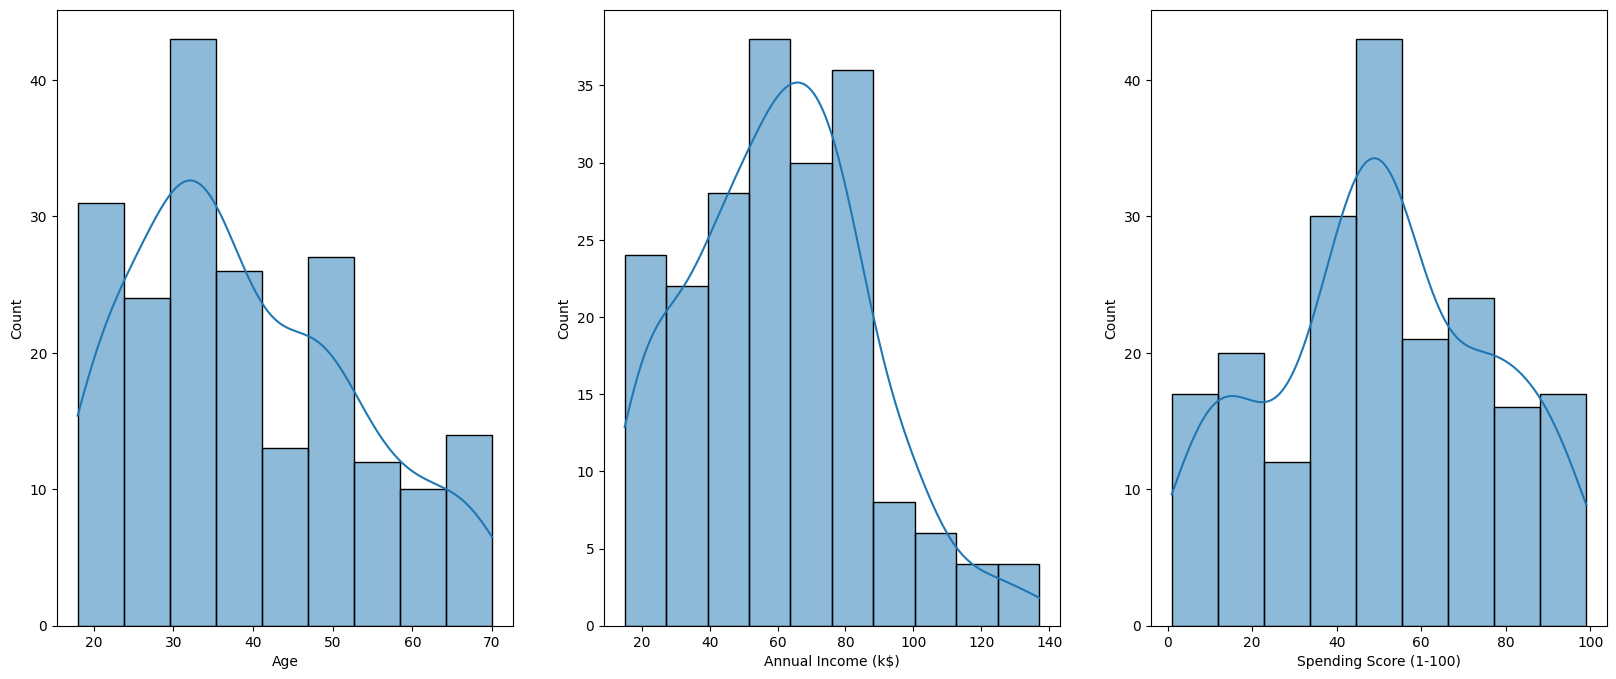

In [13]:
import seaborn as sns
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.histplot(df['Age'],kde=True)
plt.subplot(1,3,2)
sns.histplot(df['Annual Income (k$)'],kde=True)
plt.subplot(1,3,3)
sns.histplot(df['Spending Score (1-100)'],kde=True)

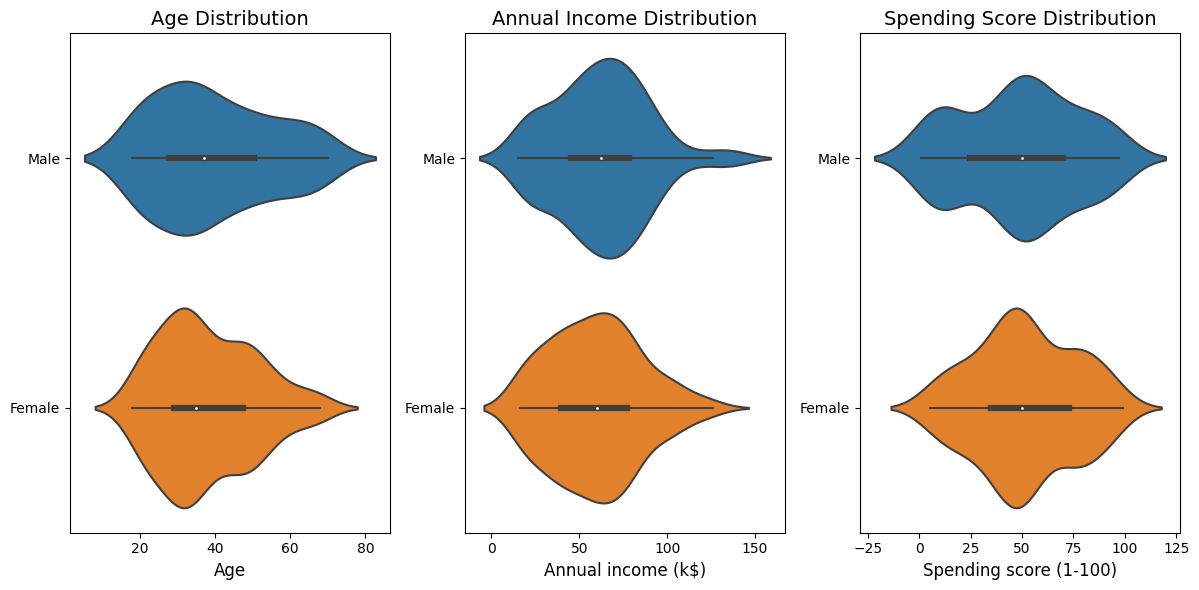

In [14]:
##Violin plot
plt.figure(figsize=(12, 6))

plot_titles = ['Age Distribution', 'Annual Income Distribution', 'Spending Score Distribution']
categories_order = ['Male', 'Female']

for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    ax = plt.subplot(1, 3, i+1)
    sns.violinplot(x=col, y='Gender', data=df, order=categories_order)
    ax.set_xlabel(col.capitalize(), fontsize=12)
    ax.set_ylabel('')
    ax.set_title(plot_titles[i], fontsize=14)

plt.tight_layout()
plt.show()

## Encoding

In [15]:
#replacing the value of male as 0 and female as 1
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [16]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40

In [17]:
df['Gender'].value_counts()

Gender
1    112
0     88
Name: count, dtype: int64

In [18]:
corr=df.corr()

<Axes: >

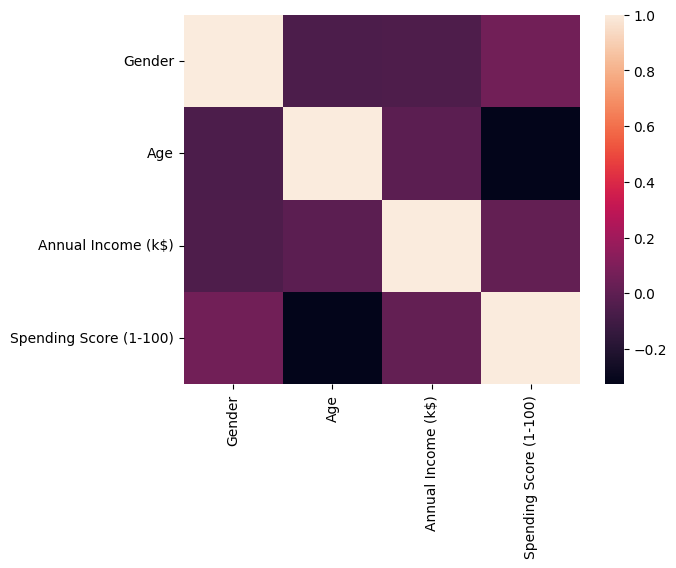

In [19]:
sns.heatmap(corr)

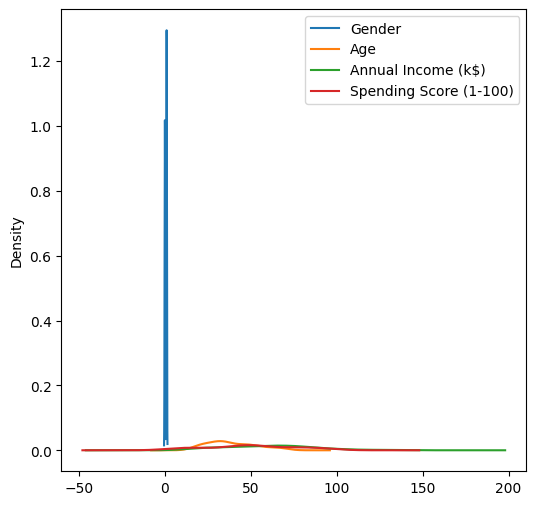

In [20]:
df.plot(kind='density',layout=(6,6),figsize=(6,6))
plt.show() 

In [21]:
df.drop('Gender',inplace=True,axis=1)

### Converting DataFrame to Array

In [22]:
array=df.to_numpy()

In [23]:
array[:5]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40]], dtype=int64)

In [24]:
array.shape

(200, 3)

## Selecting K values

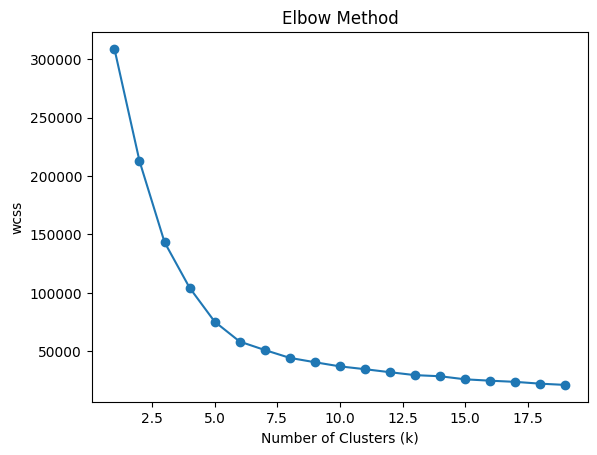

In [25]:
# getting the value of k using elbow method
from sklearn.cluster import KMeans

var=[]
k=range(1,20)

for i in k:
    kmean=KMeans(n_clusters=i,n_init=10)
    kmean.fit(array)
    var.append(kmean.inertia_) #inertia_ gives Sum of squared distances of samples to their closest cluster center
    y_pred=kmean.predict(array)
    
plt.plot(k,var, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,n_init=10)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)

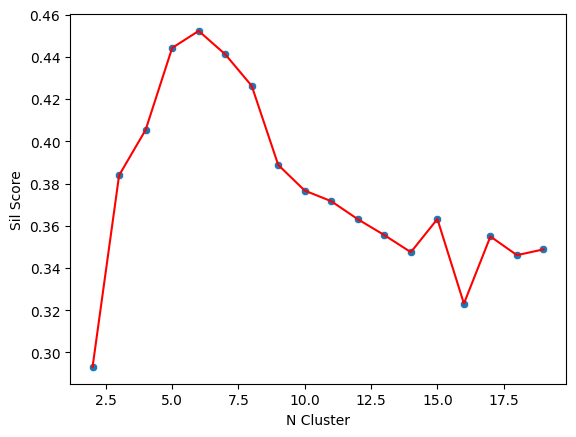

In [28]:
plt.figure()
sns.scatterplot(x=n_cluster,y=sil)
sns.lineplot(x=n_cluster,y=sil,color = 'red')
plt.xlabel('N Cluster')
plt.ylabel('Sil Score')
plt.show()

##### As we can see Elbow and  is somewhere close to 5
##### Lets try taking no. of clusters as 5

In [59]:
cluster=KMeans(n_clusters=5,random_state=2)
cluster.fit(array)
y_pred=cluster.predict(array)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [60]:
y_pred

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

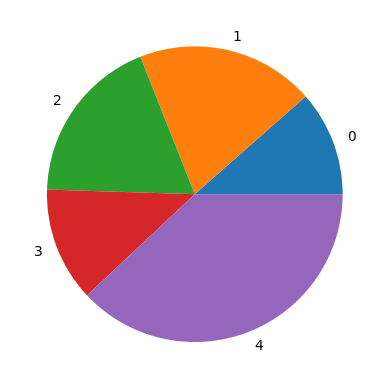

In [61]:
values,counts=np.unique(y_pred,return_counts=True)
plt.pie(counts,labels=values,)
plt.show()

In [62]:
import pickle
pickle.dump(cluster,open('final.pkl','wb'))

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

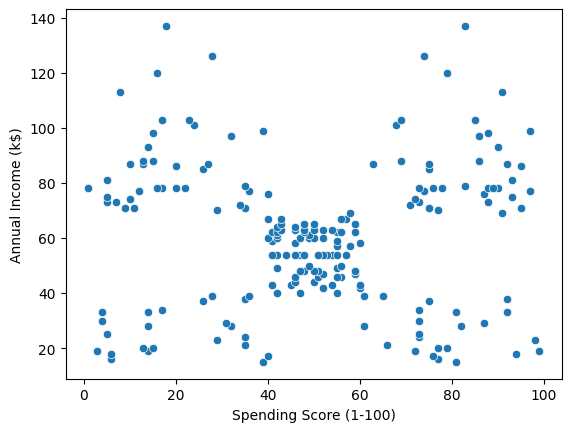

In [63]:
sns.scatterplot(x="Spending Score (1-100)",y="Annual Income (k$)",data=df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

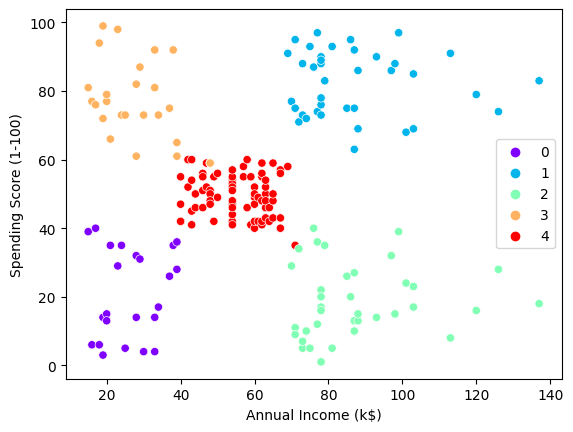

In [64]:
plt.plot()
sns.scatterplot(y="Spending Score (1-100)",x="Annual Income (k$)",hue=y_pred,data=df,palette='rainbow')

- 0 Sensible - low income and low spenders
- 1 Target group - middle-to-high income and high spenders (should be targeted by the mall)
- 2 Careful - high income but low spenders
- 3 Careless - low income but high spenders (should be avoided because of possible credit risk)
- 4 Standard - middle income and middle spenders

To do:
k means clustering to find outliers
what if data was in millions
find variance
how to define if model is optimal

In [65]:
df

Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]

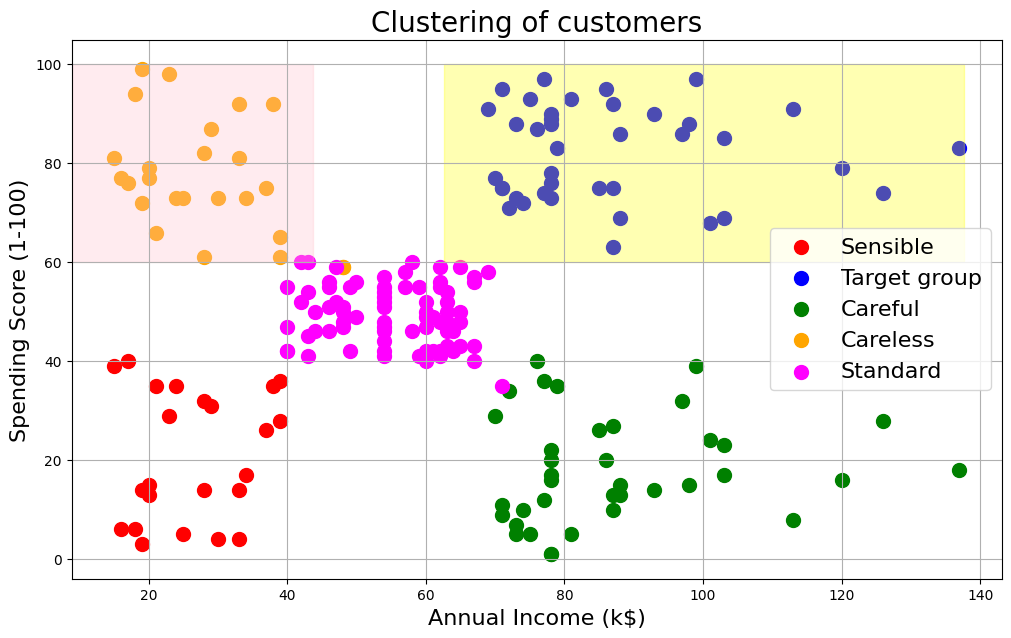

In [66]:
X = df.iloc[:,[1,2]].values
plt.figure(figsize=(12,7))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Sensible')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Target group')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Careful')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Standard')
plt.title('Clustering of customers',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.axhspan(ymin=60,ymax=100,xmin=0,xmax=0.26,alpha=0.3,color='pink')
plt.show()

In [67]:
df['cluster no.']=y_pred

In [68]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

### Now taking value of k as 6

In [70]:
cluster=KMeans(n_clusters=6,random_state=2)
cluster.fit(array)
y_pred2=cluster.predict(array)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



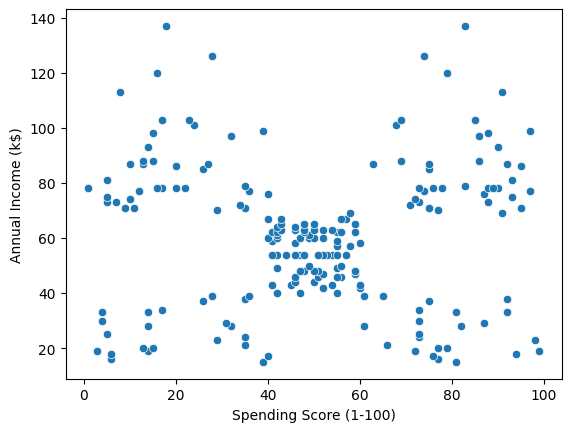

In [71]:
sns.scatterplot(x="Spending Score (1-100)",y="Annual Income (k$)",data=df)
plt.show()

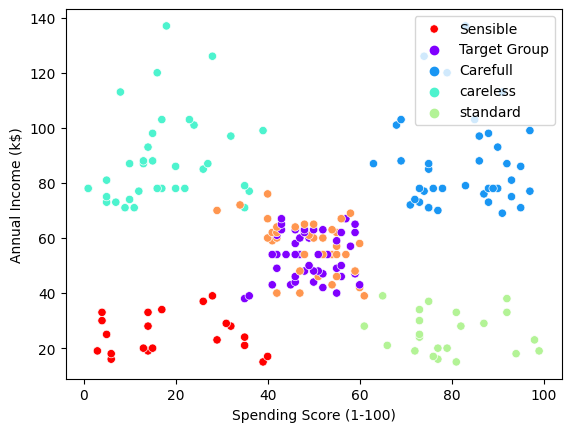

In [72]:
sns.scatterplot(x="Spending Score (1-100)",y="Annual Income (k$)",data=df,hue=y_pred2,palette='rainbow')
plt.legend(loc='upper right',labels=['Sensible', 'Target Group', 'Carefull','careless','standard'])  # Change the legend position to upper right
plt.show()